# Lab 6

### <span style="color:chocolate"> Submission requirements </span>

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Be sure your submitted notebook includes the output of your run (Hint: go to Kernel -> Restart Kernel and Run All Cells...)
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

This lab connects all the pieces involved in training feed-forward fully connected neural networks. You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for both the MNIST and FASHION_MNIST datasets, and report your findings.

In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

## Datasets


### Fashion MNIST

We load the fashion_mnist dataset as before.

4422102/4422102 [==============================] - 0s 0us/step
Label: t-shirt


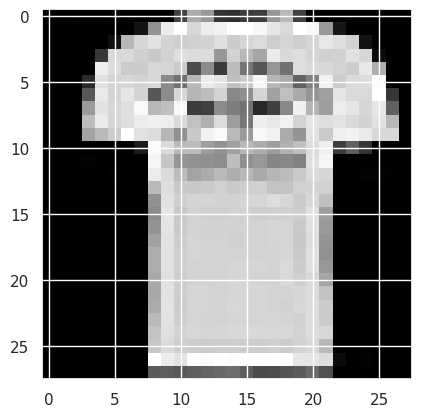

In [ ]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

# Show the first training example.
print('Label: %s' %label_names[Y_train_fashion[0]])
plt.imshow(X_train_fashion[0], cmap='gray')
plt.show()

### MNIST

We also load the (digits) mnist dataset in the same way. Note that the number of train/test examples as well as the data shapes are identical to fashion_mnist.

11490434/11490434 [==============================] - 0s 0us/step
Label: 3


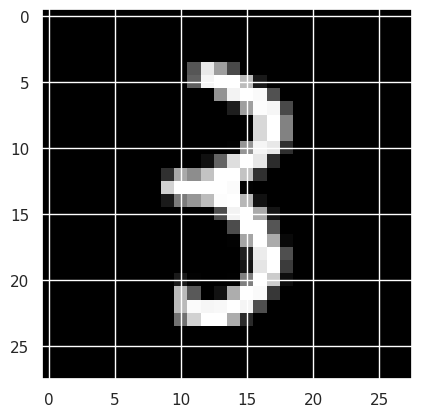

In [ ]:
from keras.datasets import mnist

# Load the MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

# Show the first training example.
print('Label: %d' %Y_train_digits[0])
plt.imshow(X_train_digits[0], cmap='gray')
plt.show()

## Build a Model

We will write a build_model function that allows for a range of experiments on both datasets.

---
### Exercise 1 (50 points)

Fill in code that implements the build_model function, including all the arguments listed in the function definition [Note: the activation function parameter is only for the the hidden layers, use the appropriate final classification function for the final layer as usual].

In [ ]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
    """Build a multi-class logistic regression model using Keras.

    Args:
      n_classes: Number of output classes in the dataset.
      hidden_layer_sizes: A list with the number of units in each hidden layer.
      activation: The activation function to use for the hidden layers.
      optimizer: The optimizer to use (SGD, Adam).
      learning_rate: The desired learning rate for the optimizer.

    Returns:
      model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    model = keras.Sequential()

    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    for size in hidden_layer_sizes:
        model.add(keras.layers.Dense(size, activation=activation))

    model.add(keras.layers.Dense(n_classes, activation='softmax'))

    if optimizer == "SGD":
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "Adam":
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unknown optimizer")

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


---

## Run Experiments

We can now run a suite of experiments to see how the hyperparameters and layer sizes effect performance. The train_and_evaluate function below can be used to run experiments and retrieve results.

Training...


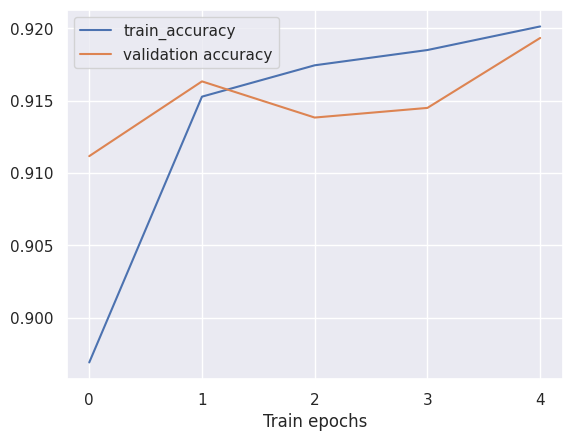

Test Accuracy: 0.9211


In [ ]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=5):

  # Build the model.
  model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  # Select the dataset.
  if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
  elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion
  else:
    raise 'Unsupported dataset: %s' %data

  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=64,
    validation_split=0.1,
    verbose=0)

  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  return test_accuracy

print('Test Accuracy: %1.4f' %train_and_evaluate())

---
### Exercise 2 (50 points)

Run experiments and fill in the test results in the table below. Feel free to extend the table to more experiments as you see fit.

Training...


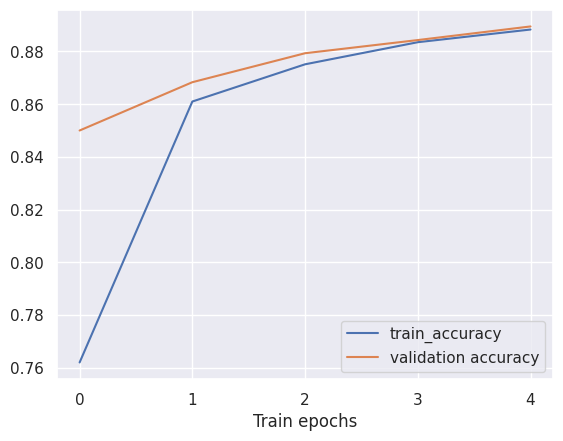

{'data': 'digits', 'hidden_layer_sizes': [], 'activation': 'tanh', 'optimizer': 'SGD', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.9000999927520752
Training...


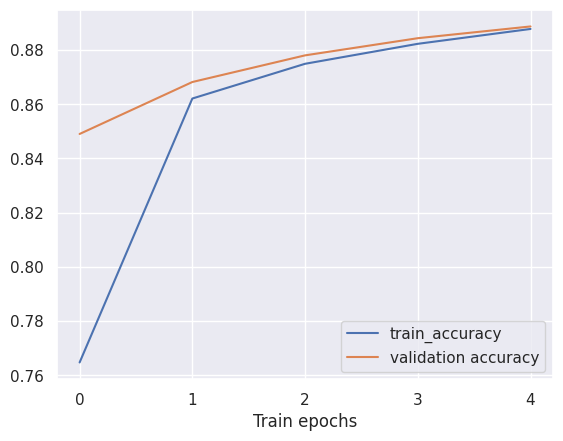

{'data': 'digits', 'hidden_layer_sizes': [], 'activation': 'relu', 'optimizer': 'SGD', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.8984000086784363
Training...


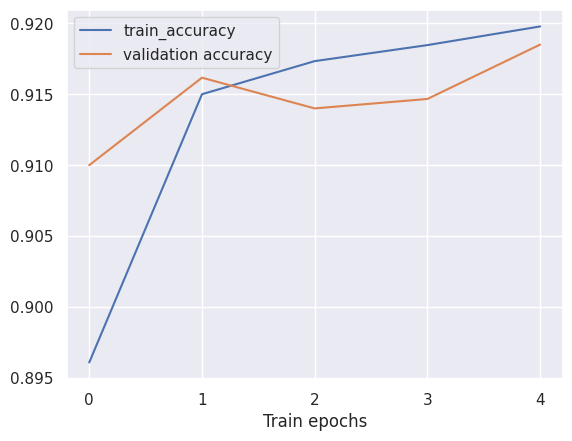

{'data': 'digits', 'hidden_layer_sizes': [], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.9208999872207642
Training...


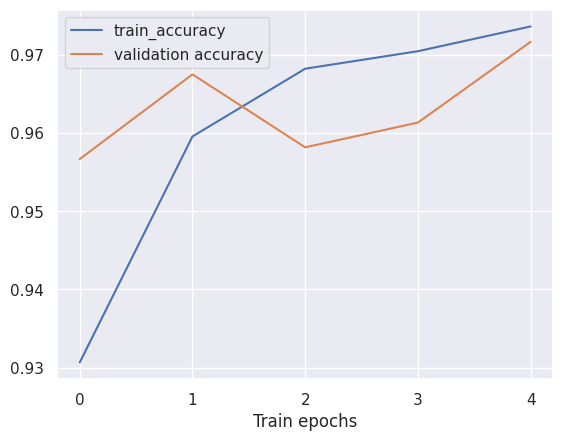

{'data': 'digits', 'hidden_layer_sizes': [128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 101770
Test Accuracy: 0.9678000211715698
Training...


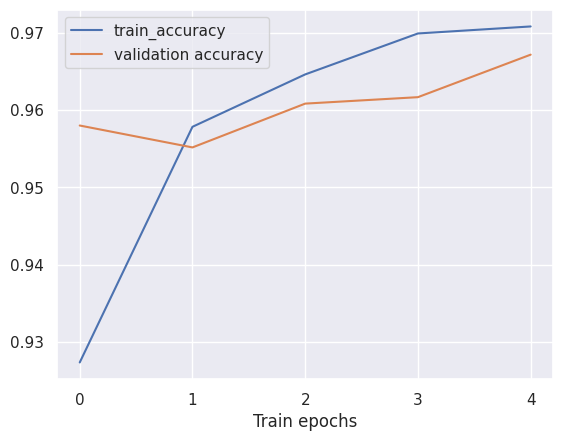

{'data': 'digits', 'hidden_layer_sizes': [256, 128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 235146
Test Accuracy: 0.9624000191688538
Training...


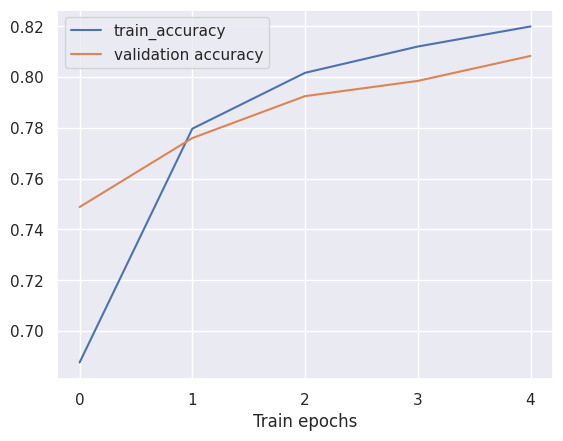

{'data': 'fashion', 'hidden_layer_sizes': [], 'activation': 'tanh', 'optimizer': 'SGD', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.8098000288009644
Training...


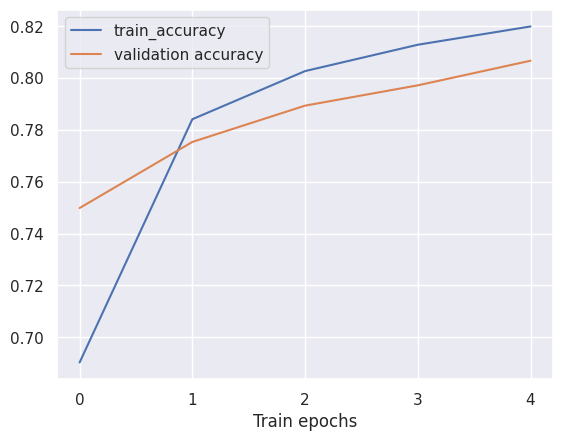

{'data': 'fashion', 'hidden_layer_sizes': [], 'activation': 'relu', 'optimizer': 'SGD', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.8090999722480774
Training...


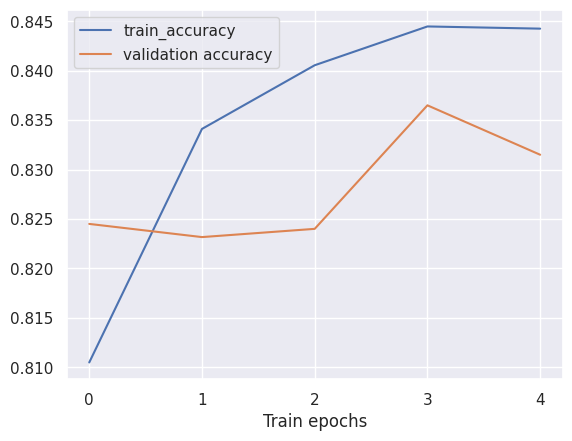

{'data': 'fashion', 'hidden_layer_sizes': [], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 7850
Test Accuracy: 0.8356000185012817
Training...


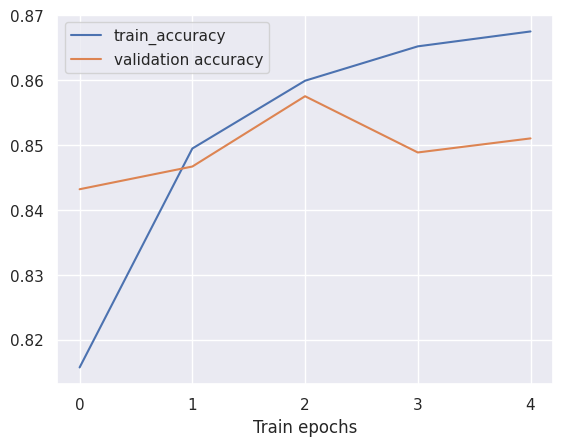

{'data': 'fashion', 'hidden_layer_sizes': [128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 101770
Test Accuracy: 0.8442999720573425
Training...


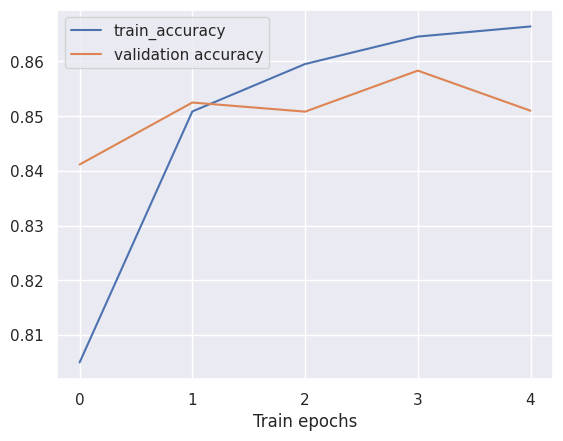

{'data': 'fashion', 'hidden_layer_sizes': [256, 128], 'activation': 'relu', 'optimizer': 'Adam', 'learning_rate': 0.01}
Number of Parameters: 235146
Test Accuracy: 0.8517000079154968


In [ ]:
experiments = [
    {"data": "digits", "hidden_layer_sizes": [], "activation": "tanh", "optimizer": "SGD", "learning_rate": 0.01},
    {"data": "digits", "hidden_layer_sizes": [], "activation": "relu", "optimizer": "SGD", "learning_rate": 0.01},
    {"data": "digits", "hidden_layer_sizes": [], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"data": "digits", "hidden_layer_sizes": [128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"data": "digits", "hidden_layer_sizes": [256, 128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"data": "fashion", "hidden_layer_sizes": [], "activation": "tanh", "optimizer": "SGD", "learning_rate": 0.01},
    {"data": "fashion", "hidden_layer_sizes": [], "activation": "relu", "optimizer": "SGD", "learning_rate": 0.01},
    {"data": "fashion", "hidden_layer_sizes": [], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"data": "fashion", "hidden_layer_sizes": [128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
    {"data": "fashion", "hidden_layer_sizes": [256, 128], "activation": "relu", "optimizer": "Adam", "learning_rate": 0.01},
]

for exp in experiments:
    accuracy = train_and_evaluate(**exp)

    build_params = {key: exp[key] for key in exp if key != 'data'}
    model = build_model(n_classes=10, **build_params)
    params = model.count_params()

    print(exp)
    print("Number of Parameters:", params)
    print("Test Accuracy:", accuracy)
    print("="*50)


DATA     | HIDDEN SIZES | ACTIVATION | OPTIMIZER | LEARNING RATE | #PARAMETERS | TEST ACCURACY
---------|--------------|------------|-----------|---------------|-------------|---------------
digits   | []           | tanh       | SGD       | 0.01          | 7,850      | 90.01%
digits   | []           | relu       | SGD       | 0.01          | 7,850      | 89.84%
digits   | []           | relu       | Adam      | 0.01          | 7,850      | 92.09%
digits   | [128]        | relu       | Adam      | 0.01          | 101,770    | 96.78%
digits   | [256,128]    | relu       | Adam      | 0.01          | 235,146    | 96.24%
-
fashion  | []           | tanh       | SGD       | 0.01          | 7,850      | 80.98%
fashion  | []           | relu       | SGD       | 0.01          | 7,850      | 80.91%
fashion  | []           | relu       | Adam      | 0.01          | 7,850      | 83.56%
fashion  | [128]        | relu       | Adam      | 0.01          | 101,770    | 84.43%
fashion  | [256,128]    | relu       | Adam      | 0.01          | 235,146    | 85.17%
